# Import Libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Obtain Data

Read csv with data into pandas

In [74]:
df = pd.read_excel('Data/Beer_Tastings.xlsx')
df.head()

,Company Name,Beer Type,Beer Name,Location,Beer Slug Name,Aaron Feuer,Alan Eng,Alejandro Torres,Alexa Dosik,Alexander Castleton,...,Unnamed: 303,Unnamed: 304,Unnamed: 305,Unnamed: 306,Unnamed: 307,Unnamed: 308,Unnamed: 309,Unnamed: 310,Unnamed: 311,Unnamed: 312
0,Einstök Ölgerð,Wheat Beer - Witbier,Icelandic White Ale,"Akureyri, Iceland",einstok-olgerd-icelandic-white-ale,...,...,...,...,...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tröegs Independent Brewing,Pilsner - German,Sunshine Pils,"Hershey, PA",troegs-independent-brewing-sunshine-pils,...,...,...,...,...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Goose Island Beer Co.,Wheat Beer - American Pale Wheat,312 Urban Wheat Ale,"Chicago, IL",goose-island-beer-co-312-urban-wheat-ale,...,...,...,...,...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Victory Brewing Company,Pilsner - German,Prima Pils,"Downingtown, PA",victory-brewing-company-prima-pils,...,...,...,...,...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Victory Brewing Company,Golden Ale,Summer Love,"Downingtown, PA",victory-brewing-company-summer-love,...,...,...,...,...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Scrub data

Drop all columns with no data

In [75]:
df.dropna(axis=1, how='all', inplace=True)
print(df.shape)
df.head()

(1015, 169)


,Company Name,Beer Type,Beer Name,Location,Beer Slug Name,Aaron Feuer,Alan Eng,Alejandro Torres,Alexa Dosik,Alexander Castleton,...,Yuri Malitsky,Zach Rosskamm,Avg. Rating,Untapped Rating,Standard Deviation,Alcohol Content,IBU,Comments,Untappd Id,Last Updated
0,Einstök Ölgerð,Wheat Beer - Witbier,Icelandic White Ale,"Akureyri, Iceland",einstok-olgerd-icelandic-white-ale,...,...,...,...,...,...,...,...,0.735714,0.736046,2.154729,0.052,0.0,"Light, Summery, Hint of Limoncillo Smell, Subt...",103773,1.627409e+12
1,Tröegs Independent Brewing,Pilsner - German,Sunshine Pils,"Hershey, PA",troegs-independent-brewing-sunshine-pils,...,...,...,...,...,...,...,...,0.670000,0.688176,0.447214,0.045,45.0,Sweet at the back of the tongue but bitter / s...,3841,1.627409e+12
2,Goose Island Beer Co.,Wheat Beer - American Pale Wheat,312 Urban Wheat Ale,"Chicago, IL",goose-island-beer-co-312-urban-wheat-ale,...,...,...,...,...,...,...,...,0.660000,0.686472,1.816590,0.042,18.0,"Solid mellow note, lack of distinct flavor, in...",5925,1.627409e+12
3,Victory Brewing Company,Pilsner - German,Prima Pils,"Downingtown, PA",victory-brewing-company-prima-pils,...,...,...,...,...,...,...,...,0.680000,0.690824,1.788854,0.053,43.0,"Mellow peach notes, hoppy, bitter after taste",3820,1.627409e+12
4,Victory Brewing Company,Golden Ale,Summer Love,"Downingtown, PA",victory-brewing-company-summer-love,...,...,...,...,...,...,...,...,0.594444,0.69069,2.098280,0.052,25.0,"Really bitter, especially for a summer ale,",18545,1.627409e+12


Drop all rows without a beer name

In [76]:
df = df[df['Untappd Id'].notna()]
df.tail()

,Company Name,Beer Type,Beer Name,Location,Beer Slug Name,Aaron Feuer,Alan Eng,Alejandro Torres,Alexa Dosik,Alexander Castleton,...,Yuri Malitsky,Zach Rosskamm,Avg. Rating,Untapped Rating,Standard Deviation,Alcohol Content,IBU,Comments,Untappd Id,Last Updated
813,Zero Gravity Craft Brewery,IPA - Imperial / Double,Madonna,"Burlington, VT",zero-gravity-craft-brewery-madonna,...,...,...,...,...,...,...,...,0.683333,0.787462,0.288675,0.08,90.0,...,1492922,1.627406e+12
814,Mainstay Independent Brewing Co.,Hefeweizen,King Laird Weisse,"Philadelphia, PA",mainstay-independent-brewing-co-king-laird-weisse,...,...,...,...,...,...,...,...,0.725000,0.730518,0.353553,0.053,0.0,...,2922851,1.627406e+12
815,Roadhouse Brewing Company,Cream Ale,Family Vacation,"Jackson, WY",roadhouse-brewing-company-family-vacation,...,...,...,...,...,...,...,...,0.450000,0.687796,0.866025,0.049,15.0,...,409513,1.627406e+12
816,Roadhouse Brewing Company,IPA - Session / India Session Ale,Loose Boots IPA,"Jackson, WY",roadhouse-brewing-company-loose-boots-ipa,...,...,...,...,...,...,...,...,0.650000,0.72804,1.414214,0.05,45.0,...,918033,1.627406e+12
817,Mainstay Independent Brewing Co.,Pale Ale - American,Meander Grapefruit Pale Ale,"Philadelphia, PA",mainstay-independent-brewing-co-meander-grapef...,...,...,...,...,...,...,...,...,0.583333,0.703536,0.577350,0.05,0.0,...,3961435,1.627406e+12


Create 'Untappd Id' codes for datapoints missing them

In [77]:
missing_id_indexes = list(df[df['Untappd Id']=='SKIP'].index)
for num, missing_id in enumerate(missing_id_indexes):
    while str(num) in ([item for item in list(df['Untappd Id']) if item != 'SKIP']):
        num += 1
    df.loc[missing_id, 'Untappd Id'] = num
df.iloc[missing_id_indexes]

,Company Name,Beer Type,Beer Name,Location,Beer Slug Name,Aaron Feuer,Alan Eng,Alejandro Torres,Alexa Dosik,Alexander Castleton,...,Yuri Malitsky,Zach Rosskamm,Avg. Rating,Untapped Rating,Standard Deviation,Alcohol Content,IBU,Comments,Untappd Id,Last Updated
173,Neville Kadwa's Garage,Fruit Beer,Steroid Apple Cider (Batch II),"Livingston, NJ",NaN,...,...,...,...,...,...,...,...,0.575000,---,1.844662,0.11,0.0,---,0,1.000000e+14
278,Neville Kadwa's Garage,Fruit Beer,Steroid Apple Cider (Batch IV),"Livingston, NJ",NaN,...,...,...,...,...,...,...,...,0.672727,---,1.633457,0.11,0.0,---,1,1.000000e+14


Create table with features for each beer

In [78]:
beers_df = pd.concat([df.iloc[:,:5], df.iloc[:,-8:]], axis=1)
beers_df.head()

,Company Name,Beer Type,Beer Name,Location,Beer Slug Name,Avg. Rating,Untapped Rating,Standard Deviation,Alcohol Content,IBU,Comments,Untappd Id,Last Updated
0,Einstök Ölgerð,Wheat Beer - Witbier,Icelandic White Ale,"Akureyri, Iceland",einstok-olgerd-icelandic-white-ale,0.735714,0.736046,2.154729,0.052,0.0,"Light, Summery, Hint of Limoncillo Smell, Subt...",103773,1.627409e+12
1,Tröegs Independent Brewing,Pilsner - German,Sunshine Pils,"Hershey, PA",troegs-independent-brewing-sunshine-pils,0.670000,0.688176,0.447214,0.045,45.0,Sweet at the back of the tongue but bitter / s...,3841,1.627409e+12
2,Goose Island Beer Co.,Wheat Beer - American Pale Wheat,312 Urban Wheat Ale,"Chicago, IL",goose-island-beer-co-312-urban-wheat-ale,0.660000,0.686472,1.816590,0.042,18.0,"Solid mellow note, lack of distinct flavor, in...",5925,1.627409e+12
3,Victory Brewing Company,Pilsner - German,Prima Pils,"Downingtown, PA",victory-brewing-company-prima-pils,0.680000,0.690824,1.788854,0.053,43.0,"Mellow peach notes, hoppy, bitter after taste",3820,1.627409e+12
4,Victory Brewing Company,Golden Ale,Summer Love,"Downingtown, PA",victory-brewing-company-summer-love,0.594444,0.69069,2.098280,0.052,25.0,"Really bitter, especially for a summer ale,",18545,1.627409e+12


Drop all columns not in 'user item rating timestamp' features used for recommender systems in surprise

In [79]:
drop_columns = list(df.iloc[:, 0:5].columns)
drop_columns.extend(list(df.iloc[:, -8:].columns))
keep_columns = ['Last Updated', 'Untappd Id']
for keep_col in keep_columns:
    drop_columns.remove(keep_col)
df.drop(columns=drop_columns, inplace=True)
df.head()

,Aaron Feuer,Alan Eng,Alejandro Torres,Alexa Dosik,Alexander Castleton,Alexis,Alla Uts,Allie Mandeville,Alyssa Kaganer,Amanda Trakhtenberg,...,Tristian,Vinny Del Gercio,Vinoad Senguttuvan,Vy,Will Kim,Yao Bao,Yuri Malitsky,Zach Rosskamm,Untappd Id,Last Updated
0,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,103773,1.627409e+12
1,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,3841,1.627409e+12
2,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,5925,1.627409e+12
3,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,3820,1.627409e+12
4,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,18545,1.627409e+12


Melt df to 'user item rating' columns format used in Surprise recommender system package

In [80]:
value_vars = list(df.iloc[:, :-2])
reco_df = df.melt(id_vars=['Untappd Id'], value_vars=value_vars)
reco_df.columns = ['Beer', 'User', 'Rating']
reco_df.head()

,Beer,User,Rating
0,103773,Aaron Feuer,...
1,3841,Aaron Feuer,...
2,5925,Aaron Feuer,...
3,3820,Aaron Feuer,...
4,18545,Aaron Feuer,...


Confirm what scrubbing of reco_df needed with df.info()

In [81]:
reco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127608 entries, 0 to 127607
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Beer    127608 non-null  object
 1   User    127608 non-null  object
 2   Rating  127608 non-null  object
dtypes: object(3)
memory usage: 2.9+ MB


Drop rows with missing ratings

In [82]:
reco_df['Rating'] = reco_df['Rating'].replace('...', np.nan)
reco_df.dropna(inplace=True)
reco_df.head()

,Beer,User,Rating
73,4947,Aaron Feuer,4.5
260,8172,Aaron Feuer,9.0
348,3147475,Aaron Feuer,7.5
350,7233,Aaron Feuer,7.0
516,2398268,Aaron Feuer,8.5


Update Beer and rating column data types to numeric types

In [83]:
reco_df = reco_df.astype({'Beer': int, 'Rating': float})
reco_df.head()

,Beer,User,Rating
73,4947,Aaron Feuer,4.5
260,8172,Aaron Feuer,9.0
348,3147475,Aaron Feuer,7.5
350,7233,Aaron Feuer,7.0
516,2398268,Aaron Feuer,8.5


Confirm reco_df is scrubbed with df.info()

In [84]:
reco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5061 entries, 73 to 126834
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Beer    5061 non-null   int64  
 1   User    5061 non-null   object 
 2   Rating  5061 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 158.2+ KB


# Explore Data

Calculate shape of dataset

In [85]:
print('Shape:', reco_df.shape)

Shape: (5061, 3)


Calculate number of beers in dataset

In [86]:
beer_count = len(reco_df.groupby('Beer').first().index)
print('Beer Count: ', beer_count)

Beer Count:  818


Calculate number of users in dataset

In [87]:
user_count = len(reco_df.groupby('User').first().index)
print('User Count: ', user_count)

User Count:  156


Calculate descriptive statistics of review ratings

In [89]:
'Review ratings descriptive statistics'
reco_df.describe()['Rating']

count    5061.000000
mean        5.898143
std         1.844270
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: Rating, dtype: float64

Plot distribution of beer reviews

Text(0, 0.5, 'Count')

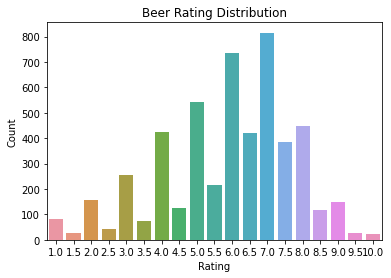

In [90]:
fig, ax = plt.subplots()
sns.countplot(x='Rating', data=reco_df, ax=ax)
ax.set_title('Beer Rating Distribution')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')

Calculate descriptive statistics for number of reviews by user

In [93]:
print('Number of reviews by user descriptive statistics:')
reviews_by_user = reco_df.groupby('User').count()['Beer']
reviews_by_user.describe()

Number of reviews by user descriptive statistics:


count    156.000000
mean      32.442308
std       79.943548
min        1.000000
25%        5.000000
50%       11.000000
75%       26.000000
max      744.000000
Name: Beer, dtype: float64

Plot distribution of number of reviews by user

Text(0, 0.5, 'Frequency')

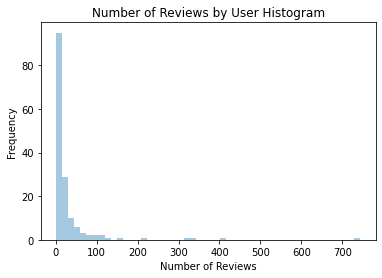

In [107]:
fig, ax = plt.subplots()
sns.distplot(reviews_by_user, bins=50, kde=False, ax=ax)
ax.set_title('Number of Reviews by User Histogram')
ax.set_xlabel('Number of Reviews')
ax.set_ylabel('Frequency')

Calculate descriptive statistics for number of reviews by beer

In [101]:
print('Number of reviews by beer descriptive statistics:')
reviews_by_beer = reco_df.groupby('Beer').count()['User']
reviews_by_beer.describe()

Number of reviews by beer descriptive statistics:


count    818.000000
mean       6.187042
std        3.810760
min        1.000000
25%        3.000000
50%        5.000000
75%        9.000000
max       23.000000
Name: User, dtype: float64

Plot distribution of number of reviews by beer

Text(0, 0.5, 'Frequency')

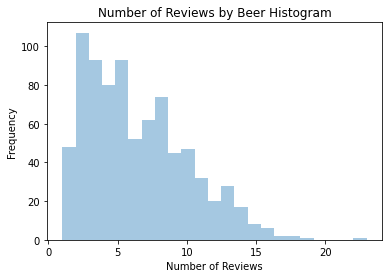

In [106]:
fig, ax = plt.subplots()
sns.distplot(reviews_by_beer, bins=23, kde=False, ax=ax)
ax.set_title('Number of Reviews by Beer Histogram')
ax.set_xlabel('Number of Reviews')
ax.set_ylabel('Frequency')

# Model Data